# Mel Spectrogram Program


In [1]:
#Importing Libraries for Audio Editing and Plotting
import librosa
import numpy as np
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy import signal
import random

In [2]:
#Load audio files using Librosa
a_file = "XC79152 - Olive-backed Pipit - Anthus hodgsoni.mp3"
ipd.Audio(a_file)


In [3]:
scale, sr = librosa.load(a_file)

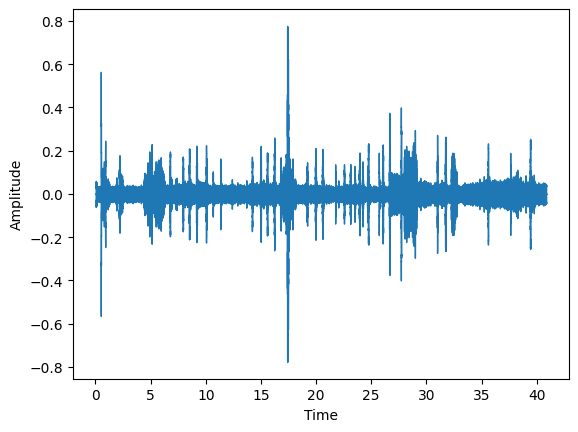

In [4]:
#WavePlot
librosa.display.waveshow(scale, sr = sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

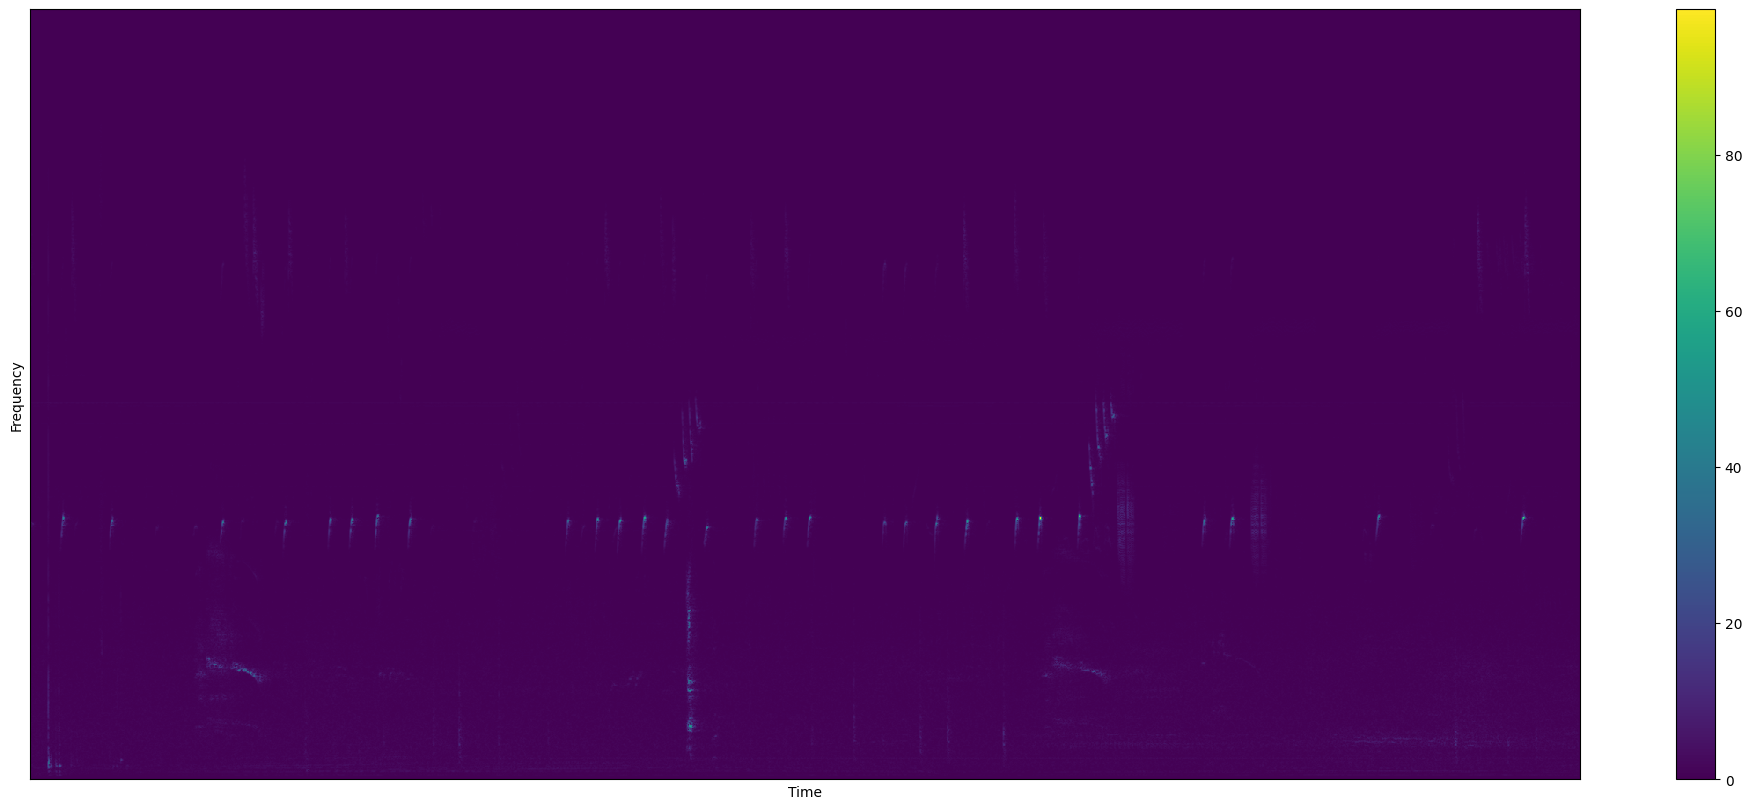

In [5]:
#Spectrogram
stft = librosa.core.stft(scale, hop_length = 512, n_fft = 2048)
spectrogram = np.abs(stft)
plt.figure(figsize=(25,10))
librosa.display.specshow(spectrogram, sr = sr, hop_length = 512)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("viridis")
plt.show()

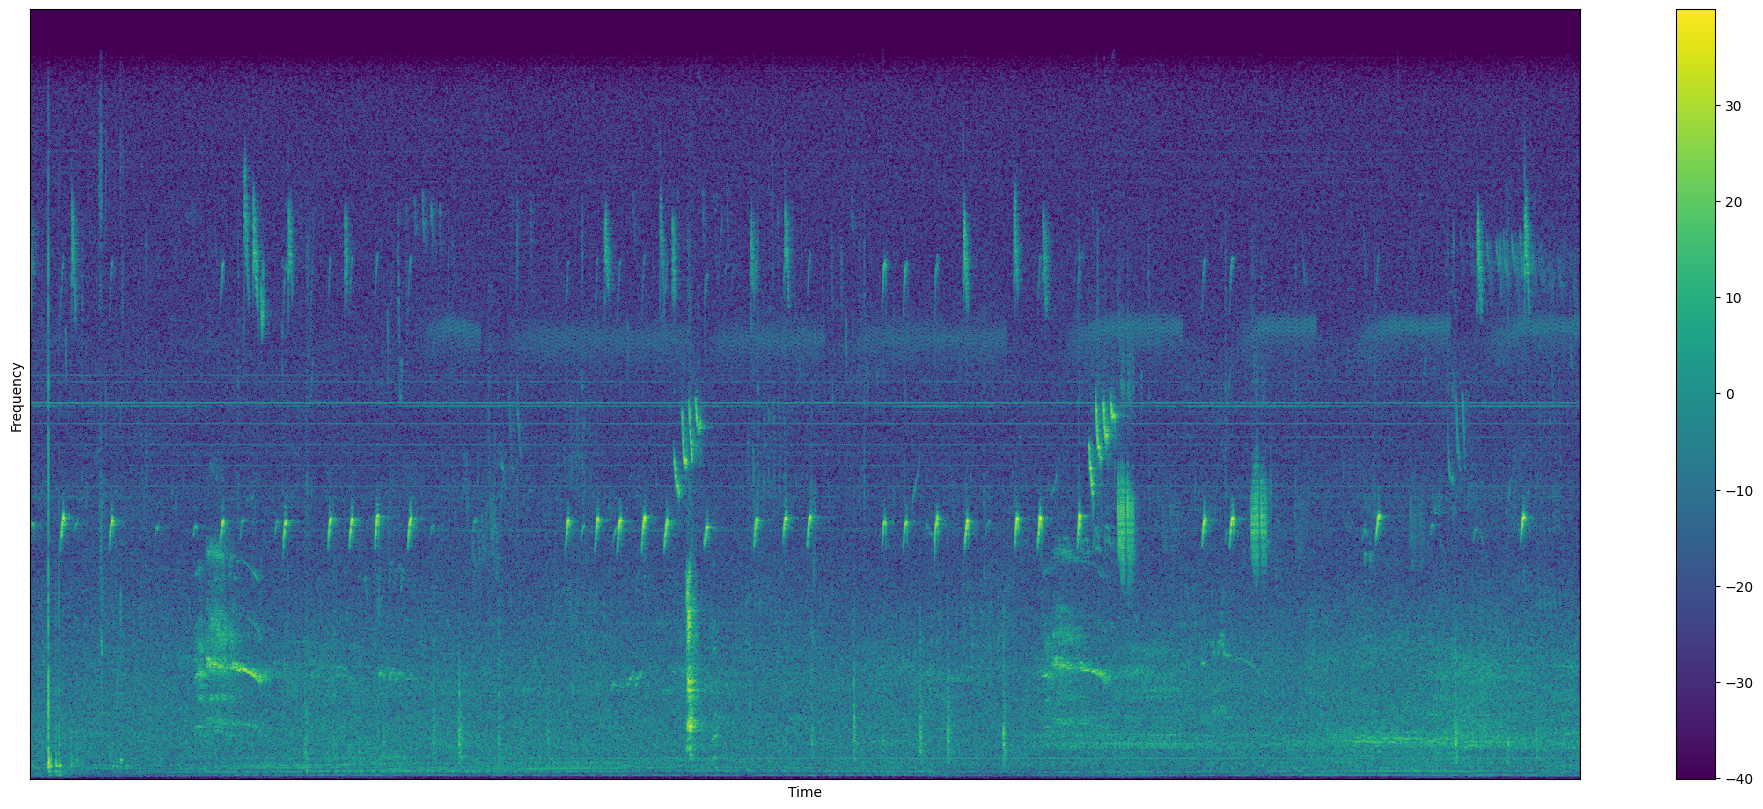

In [6]:
#Log Spectrogram
log_spectrogram  = librosa.amplitude_to_db(spectrogram)
plt.figure(figsize=(25,10))
librosa.display.specshow(log_spectrogram, sr = sr, hop_length = 512)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.set_cmap("viridis")
plt.colorbar()
plt.show()

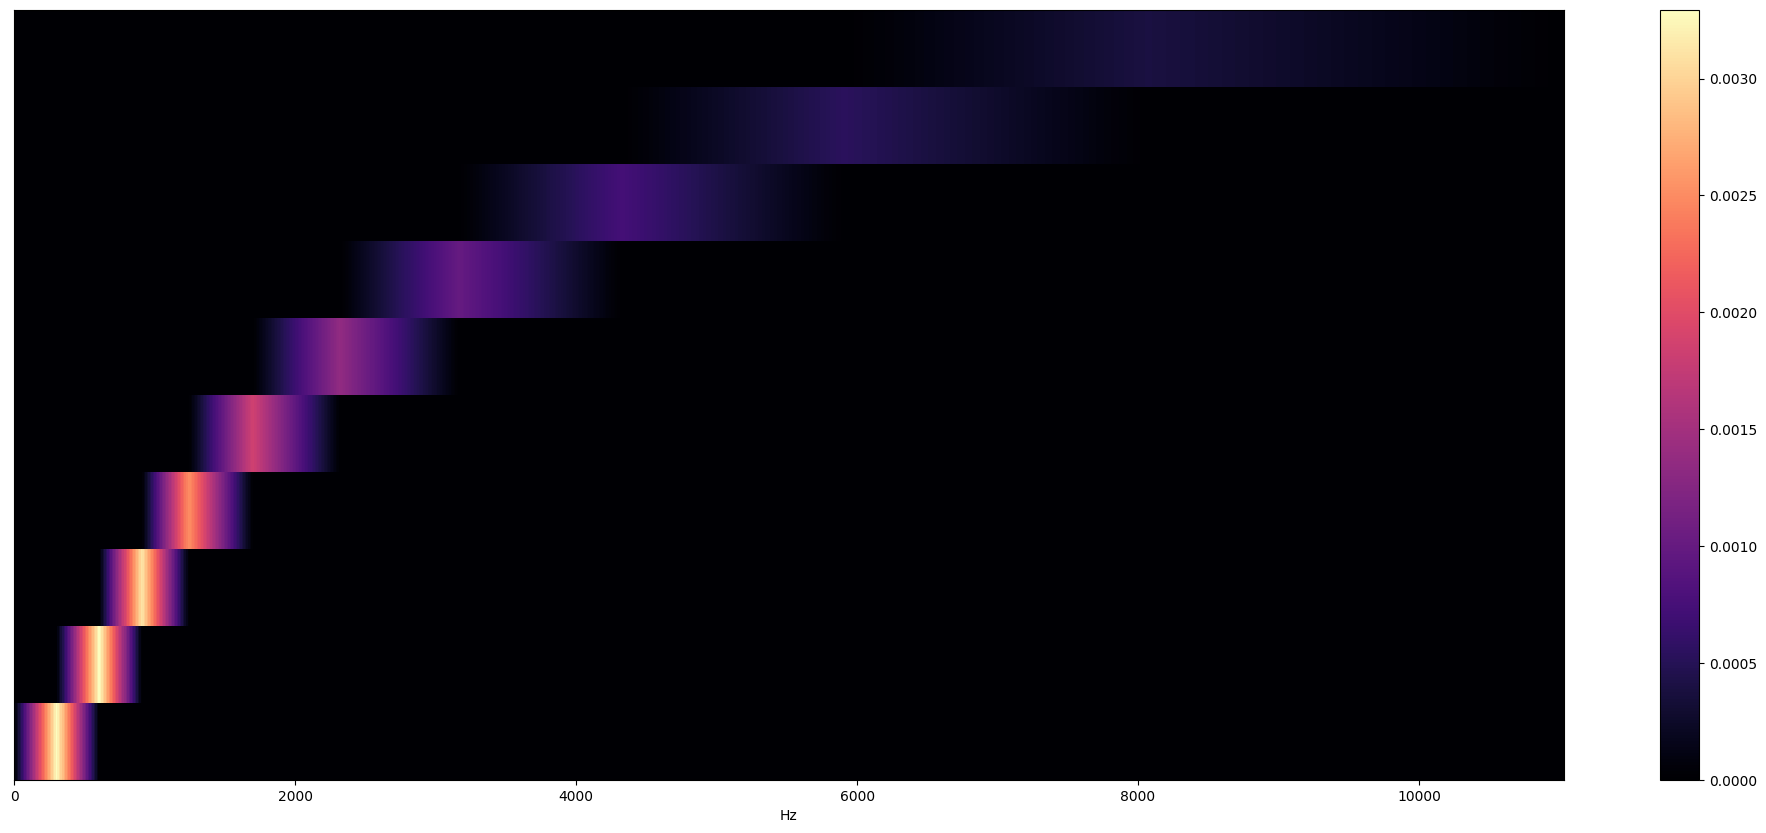

In [7]:
#MEL Filter Banks
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
filter_banks.shape
plt.figure(figsize=(25,10))
librosa.display.specshow(filter_banks, sr=sr, x_axis="linear")
plt.colorbar()
plt.show()

In [8]:
#Extracting Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
mel_spectrogram.shape
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

C:\Users\Ralph\AppData\Local\Temp\ipykernel_19140\2014834020.py:2: FutureWarning: Pass y=[-7.09440102e-12  1.69022105e-11 -1.08455696e-10 ...  2.54265870e-18
 -1.13310726e-18  3.28934962e-19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_fft=2048, hop_length=512, n_mels=10)


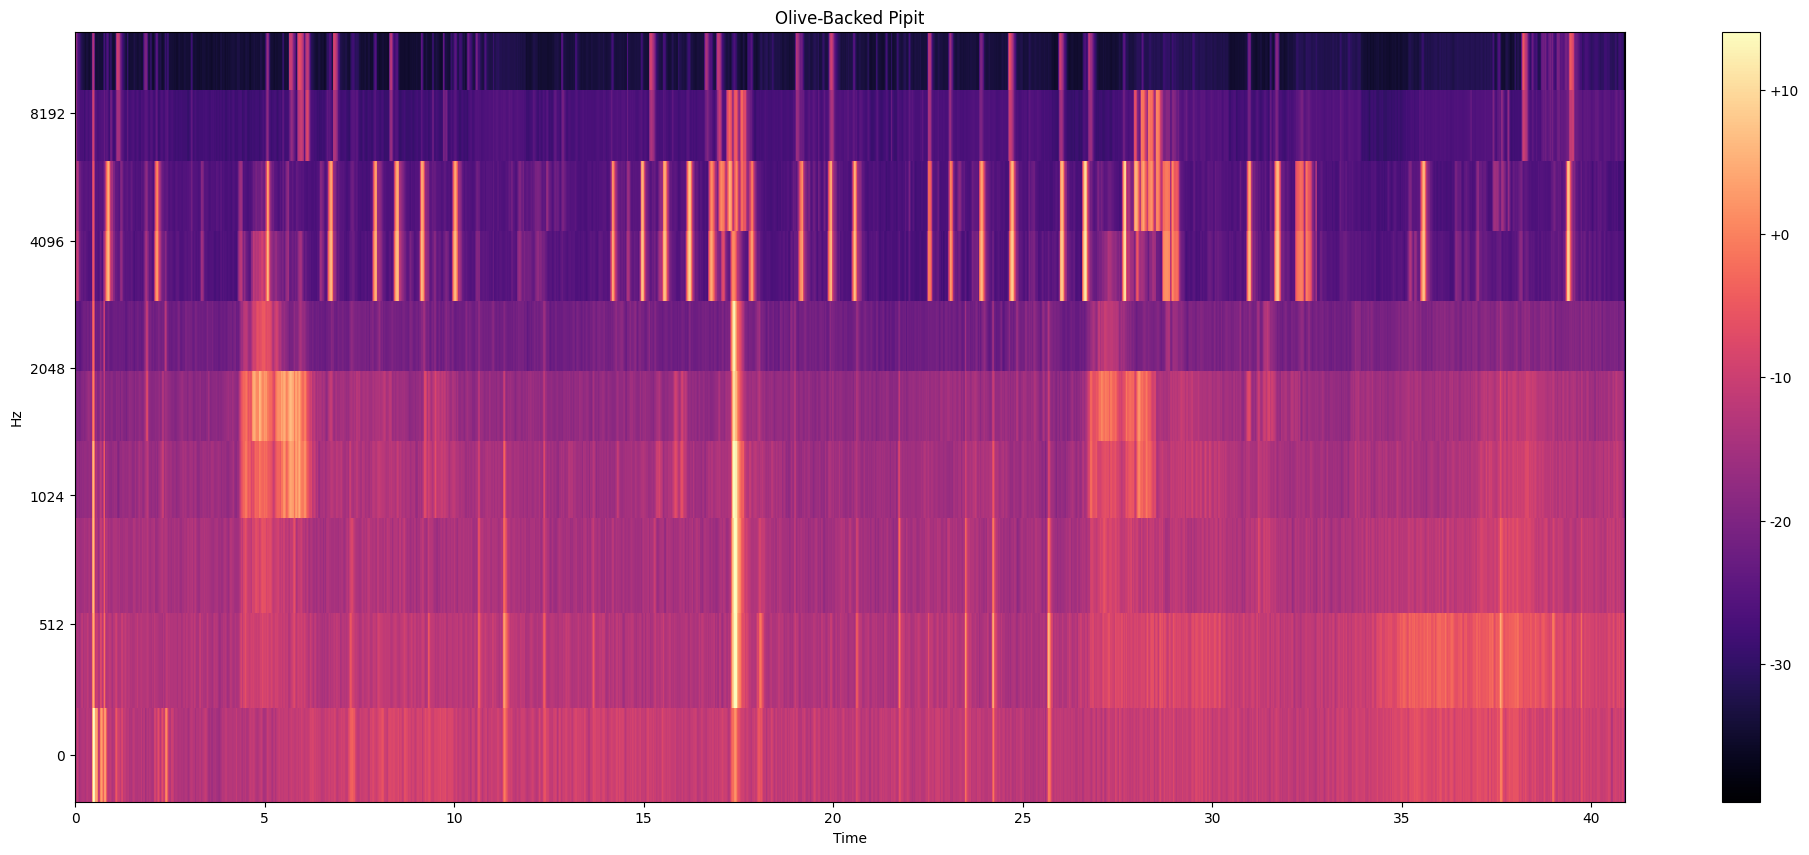

In [9]:
plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram, x_axis="time", y_axis="mel", sr=sr)
plt.colorbar(format="%+2.f")
plt.title("Olive-Backed Pipit")
plt.show()

In [10]:
#Load audio files using Librosa
a_file = "XC30767 - White-cheeked Bullfinch - Pyrrhula leucogenis.mp3"
ipd.Audio(a_file)

C:\Users\Ralph\AppData\Local\Temp\ipykernel_19140\2325452343.py:3: FutureWarning: Pass y=[-3.2174515e-13 -8.1353658e-13  3.8776450e-13 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_fft=2048, hop_length=512, n_mels=10)


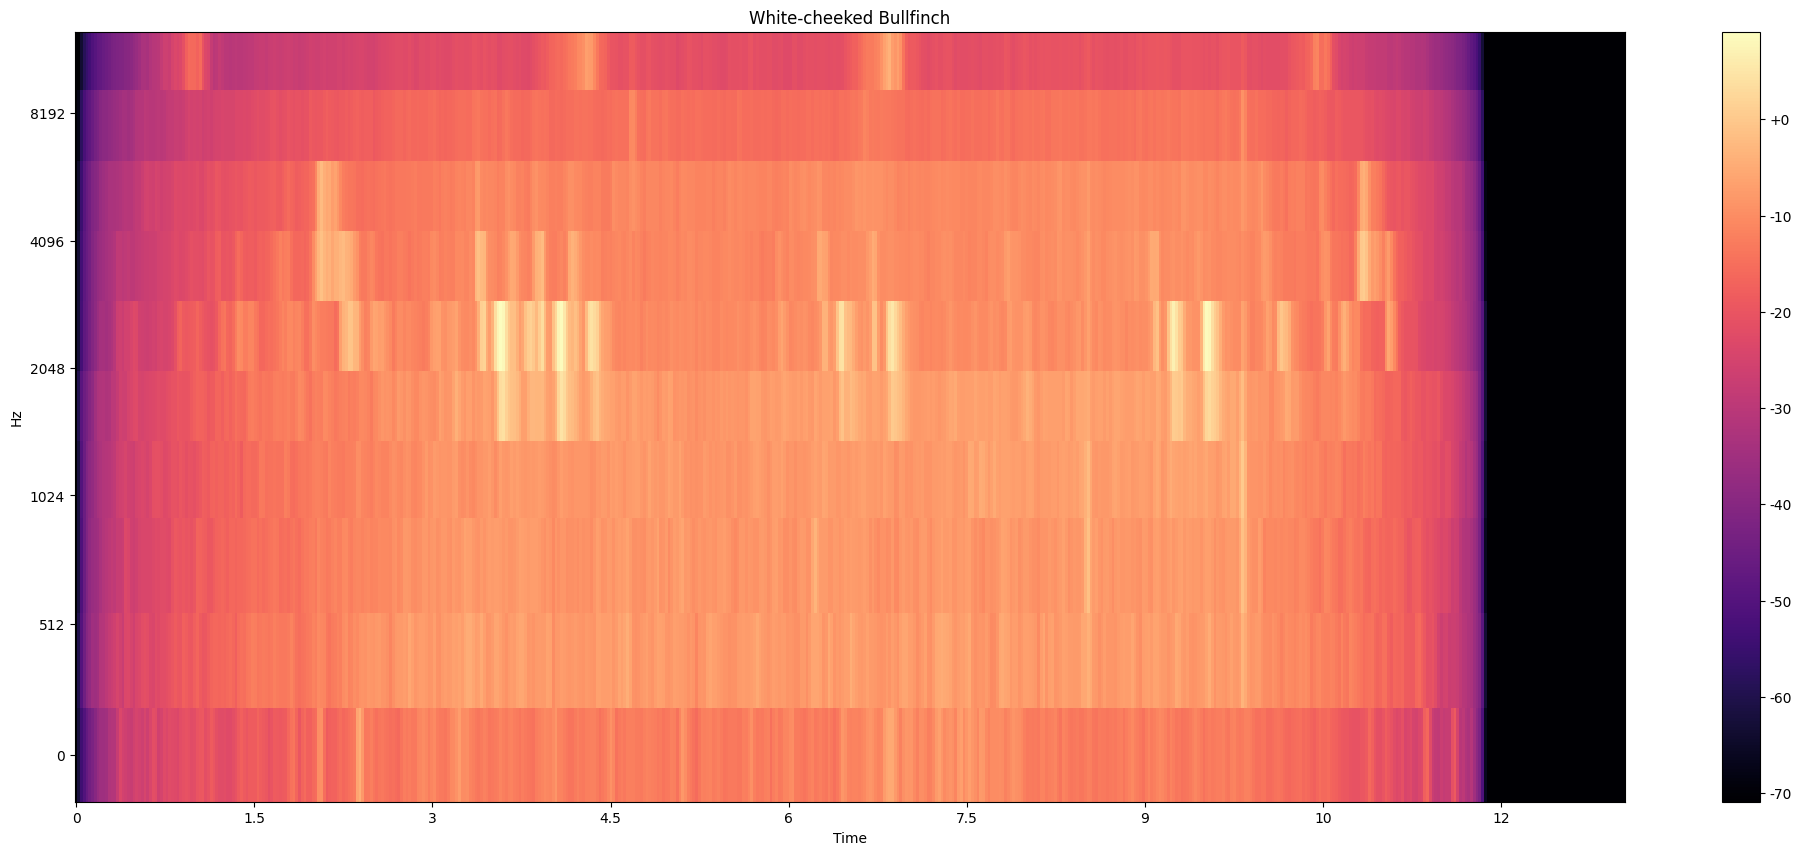

In [11]:
scale, sr = librosa.load(a_file)

mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
mel_spectrogram.shape
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram, x_axis="time", y_axis="mel", sr=sr)
plt.colorbar(format="%+2.f")
plt.title("White-cheeked Bullfinch")
plt.show()

In [12]:
#Load audio files using Librosa
a_file = "XC79389 - Yellow Bunting - Emberiza sulphurata.mp3"
ipd.Audio(a_file)

C:\Users\Ralph\AppData\Local\Temp\ipykernel_19140\4017061508.py:3: FutureWarning: Pass y=[ 3.4625317e-16  3.0569790e-16  1.1616908e-15 ...  5.0136017e-23
 -3.0847734e-23  1.8281921e-23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_fft=2048, hop_length=512, n_mels=10)


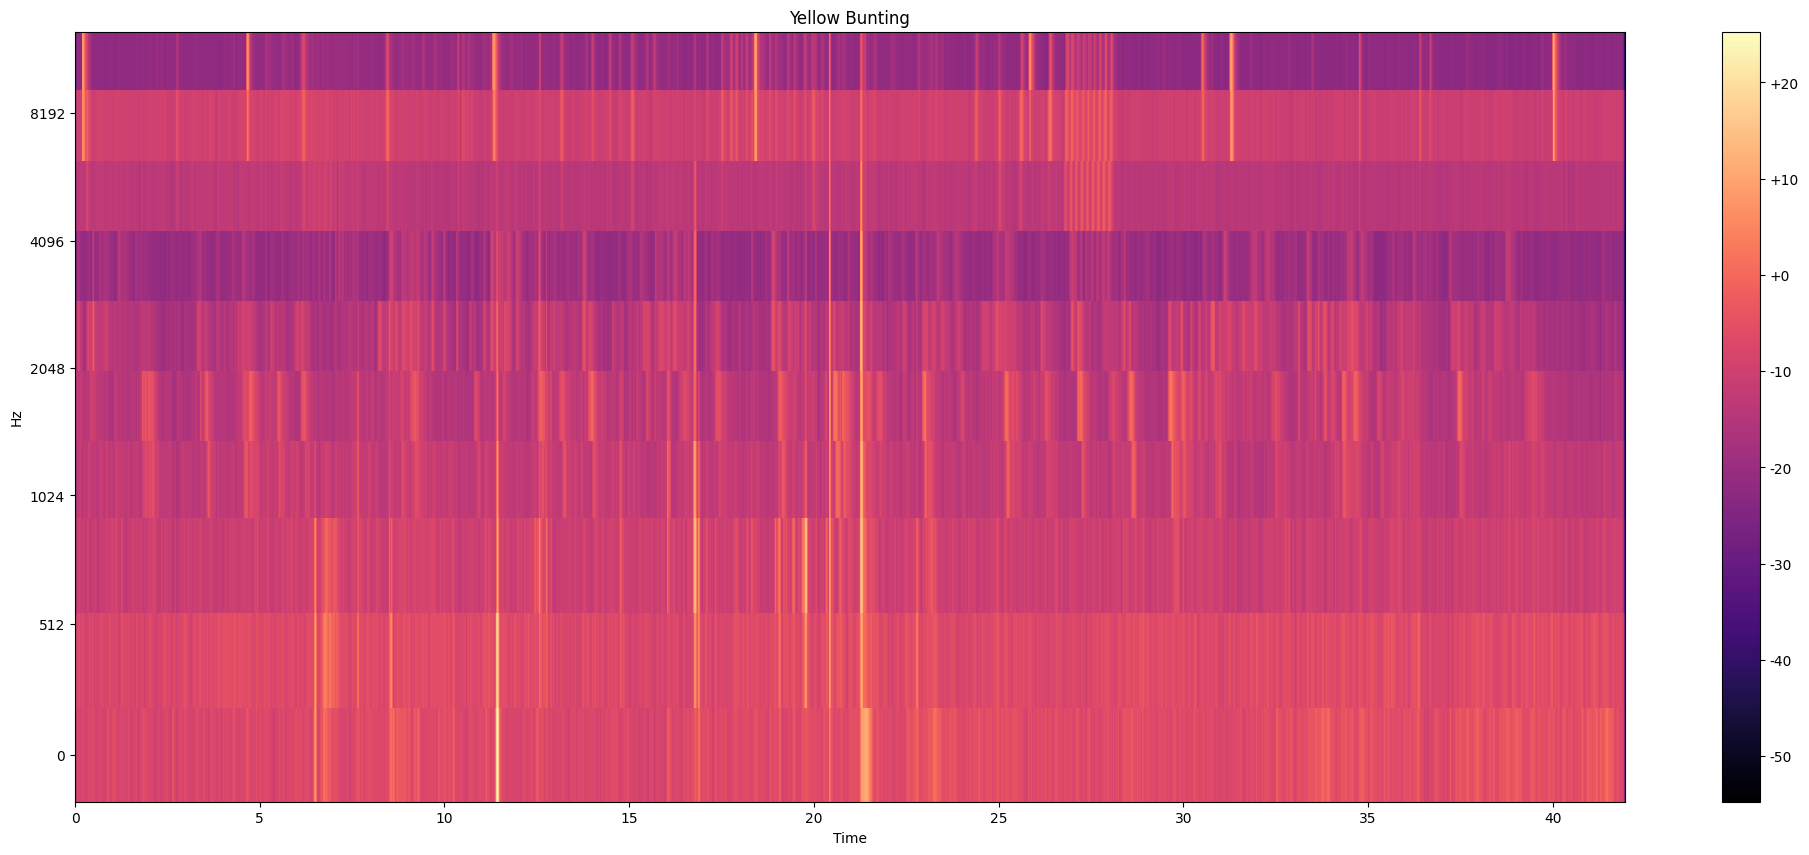

In [13]:
scale, sr = librosa.load(a_file)

mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
mel_spectrogram.shape
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram, x_axis="time", y_axis="mel", sr=sr)
plt.colorbar(format="%+2.f")
plt.title("Yellow Bunting")
plt.show()

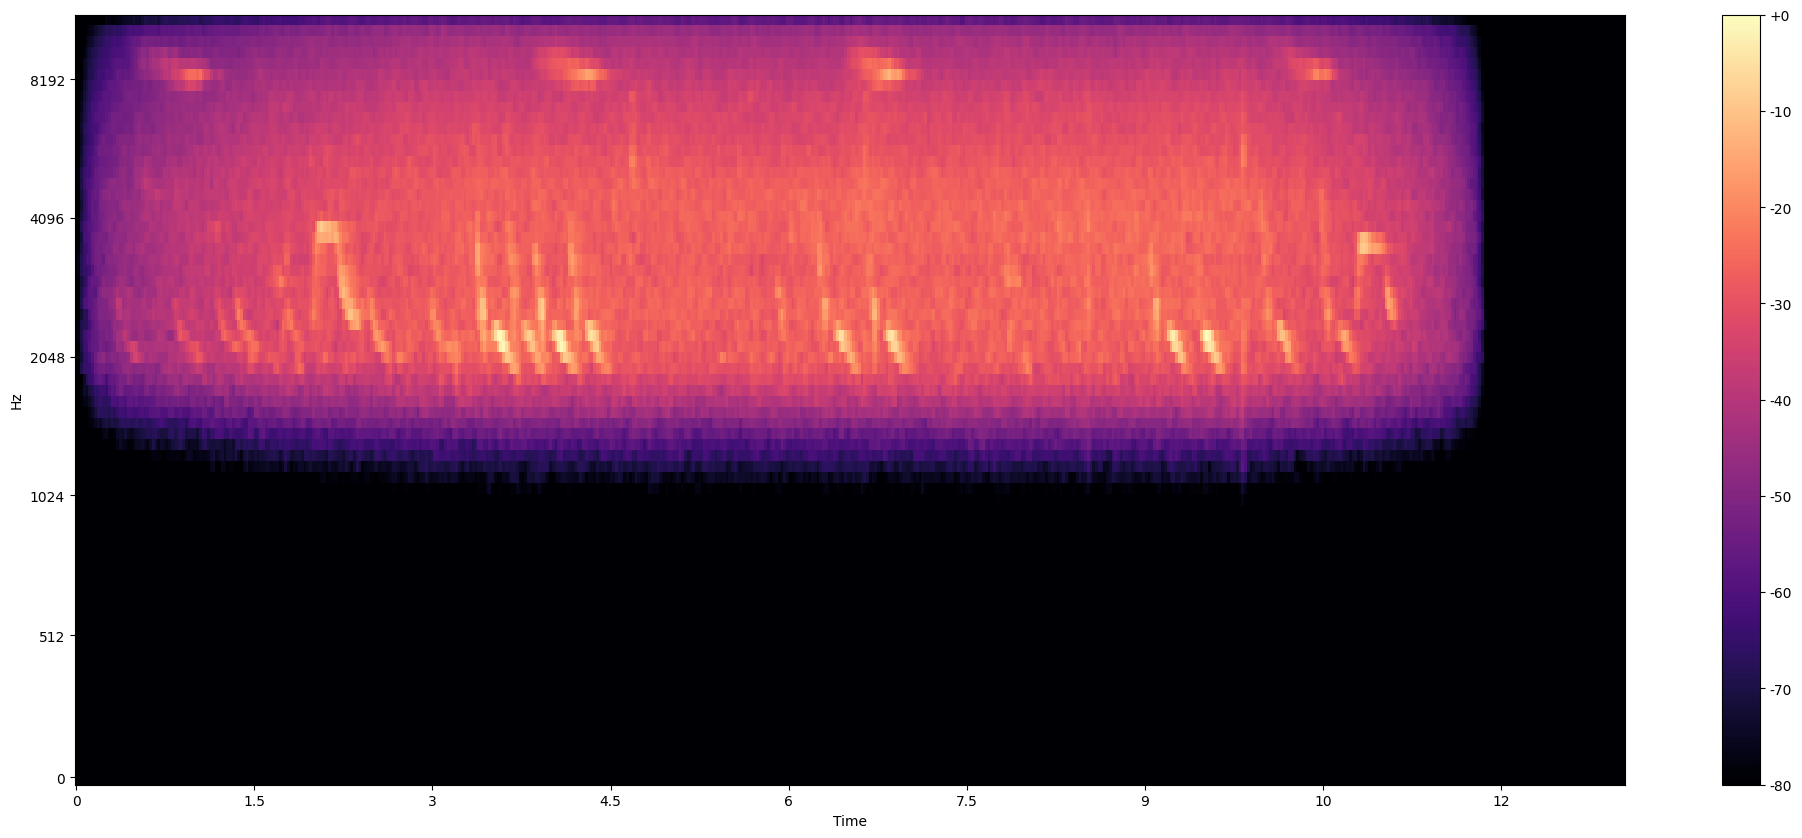

In [14]:
#Applying Low-Frequencies
a_file = "XC30767 - White-cheeked Bullfinch - Pyrrhula leucogenis.mp3"
b_file = "XC79152 - Olive-backed Pipit - Anthus hodgsoni.mp3"
c_file = "XC79389 - Yellow Bunting - Emberiza sulphurata.mp3"
y1, sr = librosa.load(a_file)
y2, sr = librosa.load(b_file)
y3, sr = librosa.load(c_file)

def filterhigh(y, sr):
    b, a = signal.butter(10, 2000/(sr/2), btype='highpass')
    yf = signal.lfilter(b,a,y)
    return yf

yf1 = filterhigh(y1, sr)
yf2 = filterhigh(y2, sr)
yf3 = filterhigh(y3, sr)

Sf1 = librosa.feature.melspectrogram(y=yf1, sr=sr, n_mels=64)
Df1 = librosa.power_to_db(Sf1, ref=np.max)
plt.figure(figsize=(25,10))
librosa.display.specshow(Df1, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.f")

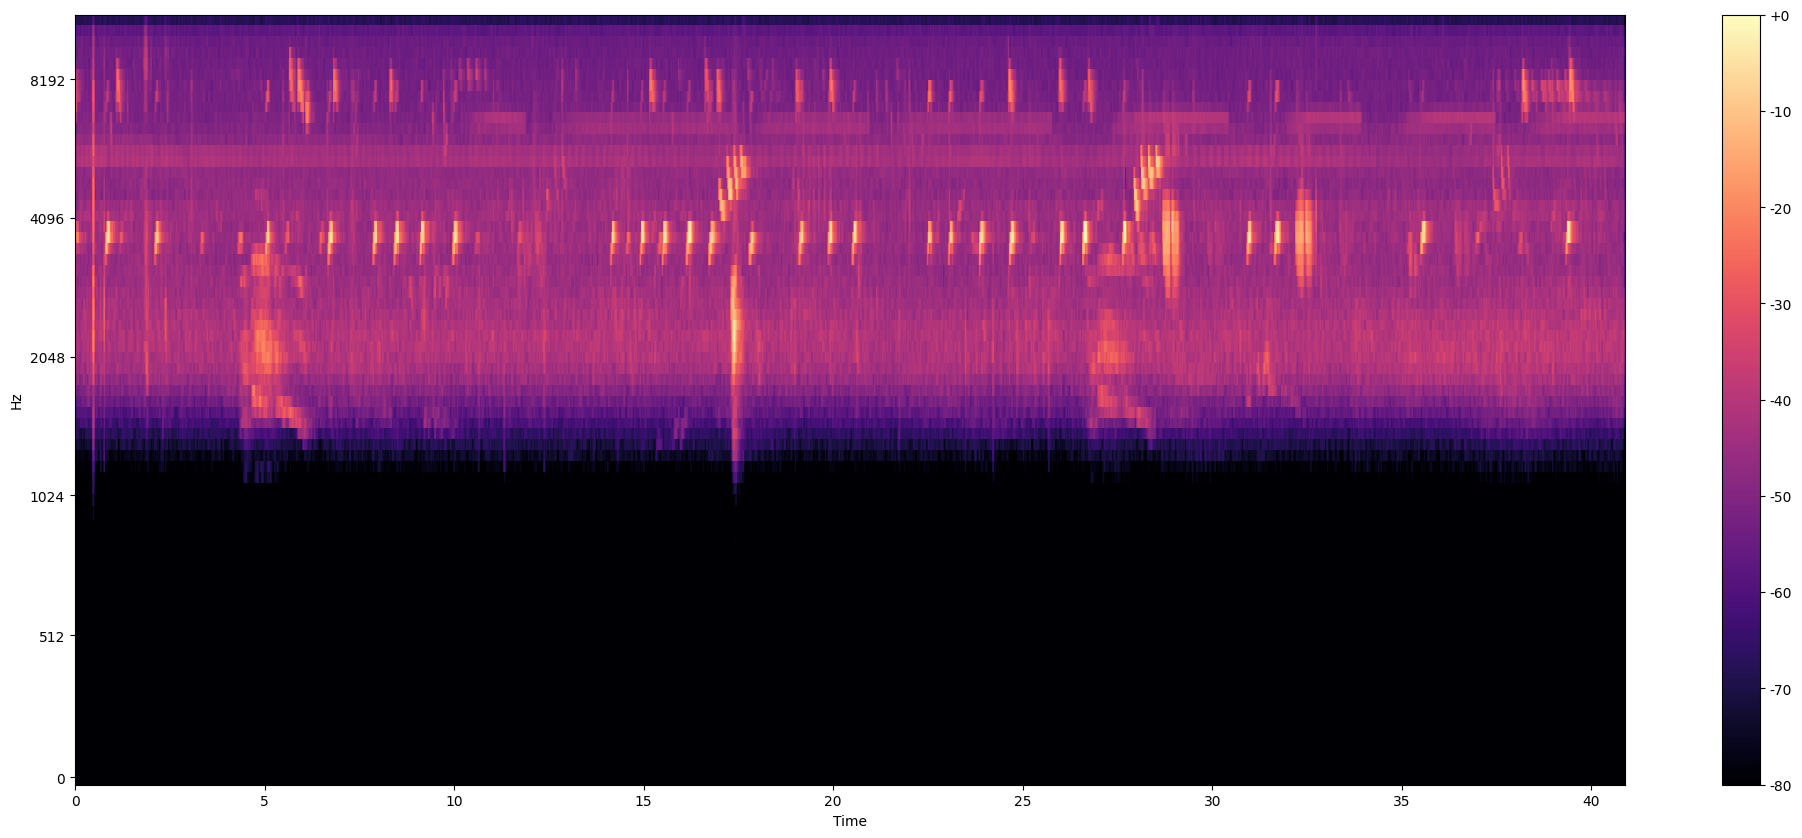

In [15]:
Sf2 = librosa.feature.melspectrogram(y=yf2, sr=sr, n_mels=64)
Df2 = librosa.power_to_db(Sf2, ref=np.max)
plt.figure(figsize=(25,10))
librosa.display.specshow(Df2, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.f")

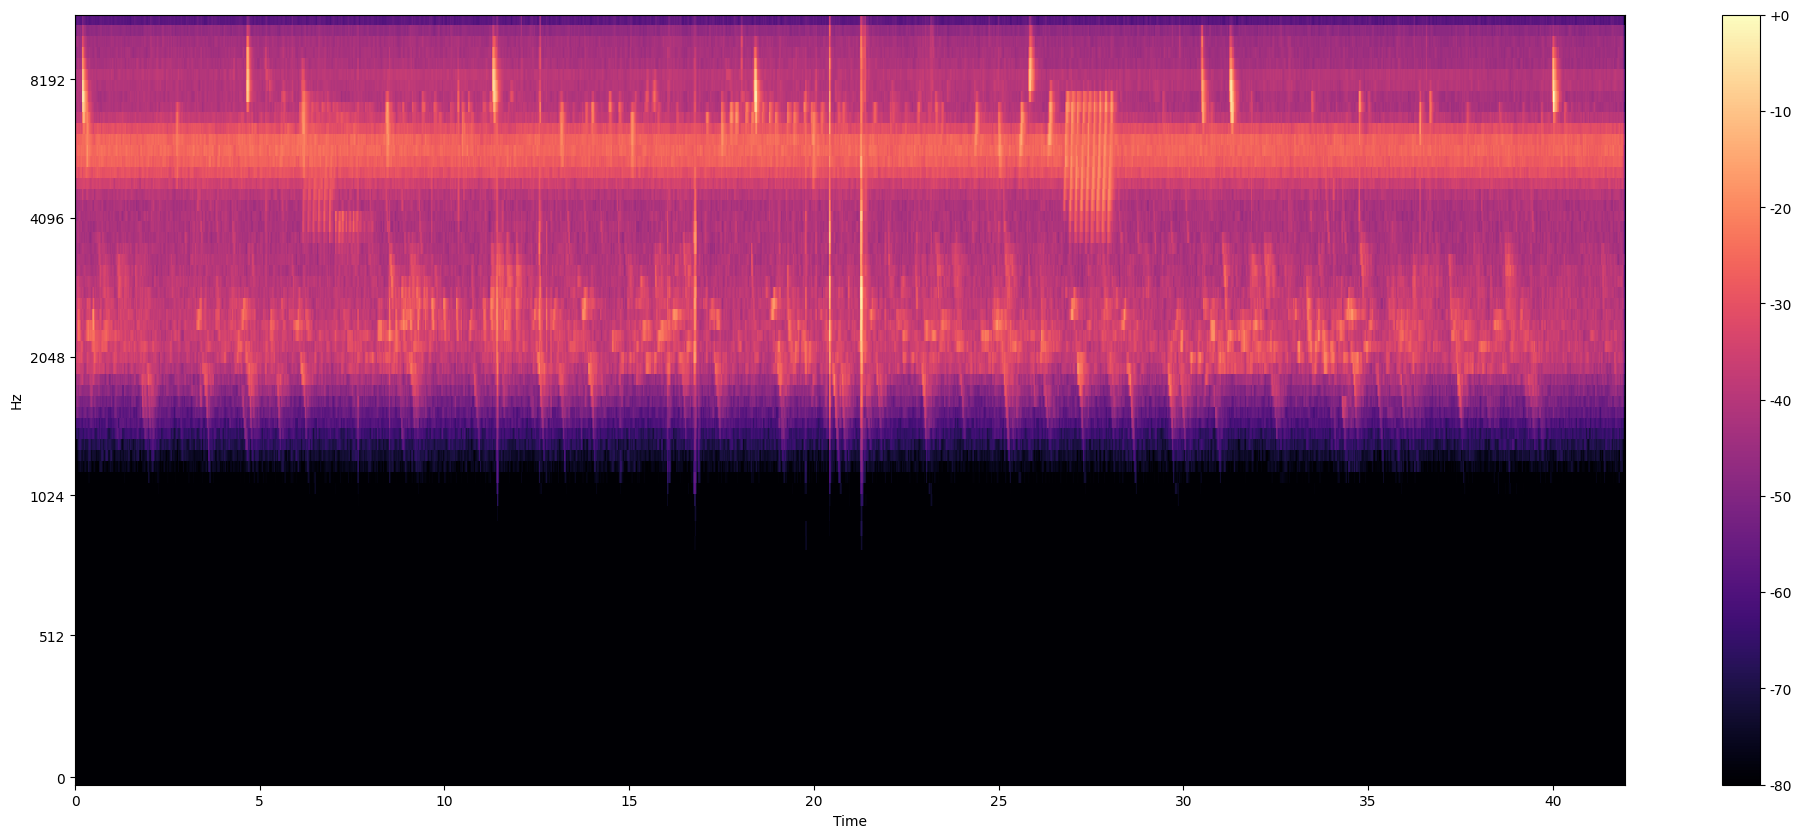

In [16]:
Sf3 = librosa.feature.melspectrogram(y=yf3, sr=sr, n_mels=64)
Df3 = librosa.power_to_db(Sf3, ref=np.max)
plt.figure(figsize=(25,10))
librosa.display.specshow(Df3, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.f")

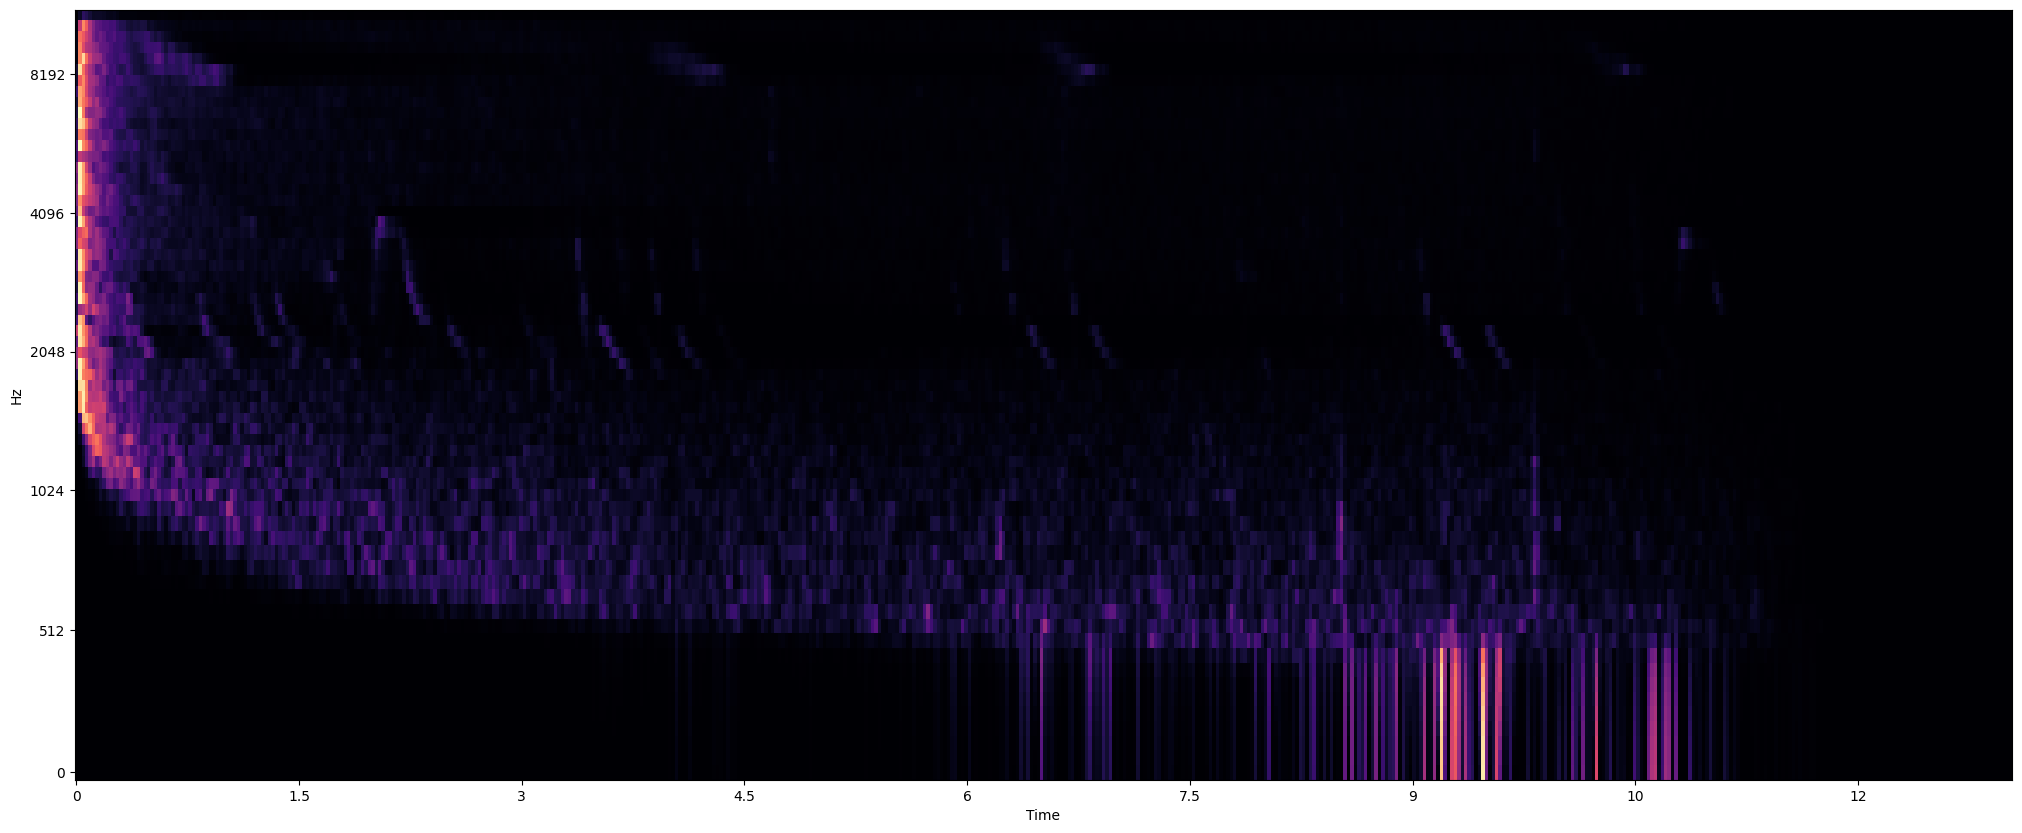

In [17]:
Dp1 = librosa.pcen(Sf1 * (2**31), sr=sr, gain=1.1, hop_length=512, bias=2, power=0.5, time_constant=0.8, eps=1e-06, max_size=2)
Dp2 = librosa.pcen(Sf2 * (2**31), sr=sr, gain=1.1, hop_length=512, bias=2, power=0.5, time_constant=0.8, eps=1e-06, max_size=2)
Dp3 = librosa.pcen(Sf3 * (2**31), sr=sr, gain=1.1, hop_length=512, bias=2, power=0.5, time_constant=0.8, eps=1e-06, max_size=2)

plt.figure(figsize=(25,10))
librosa.display.specshow(Dp1, x_axis='time', y_axis='mel')

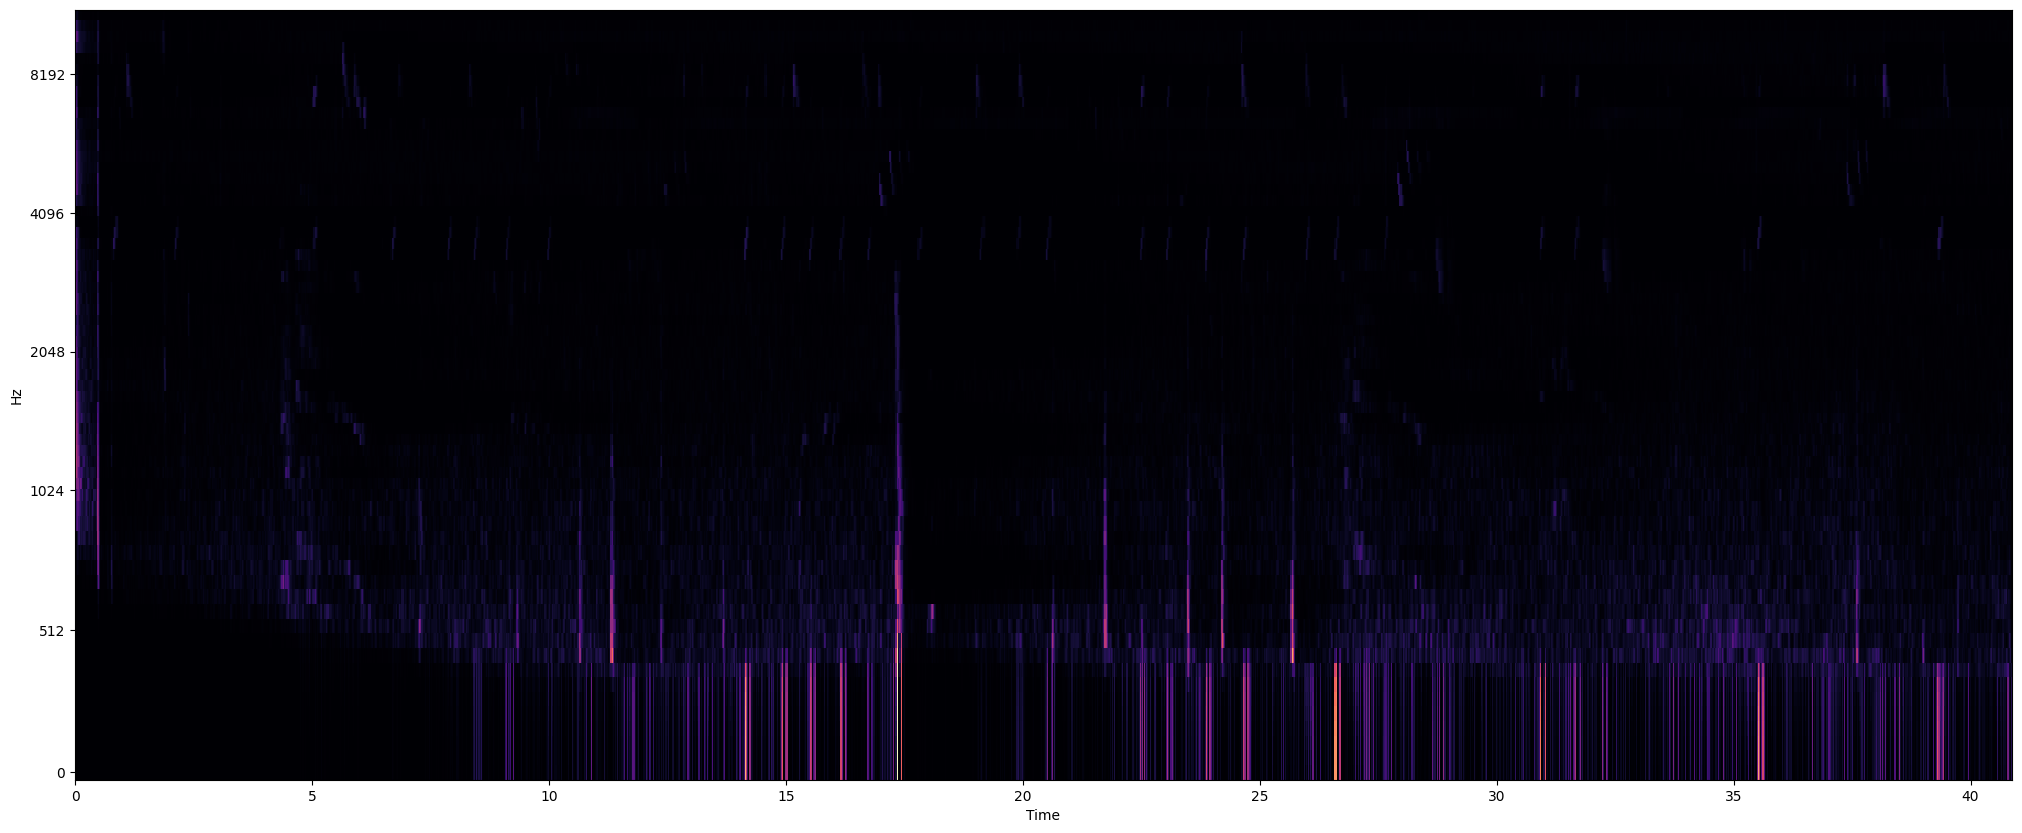

In [18]:
plt.figure(figsize=(25,10))
librosa.display.specshow(Dp2, x_axis='time', y_axis='mel')

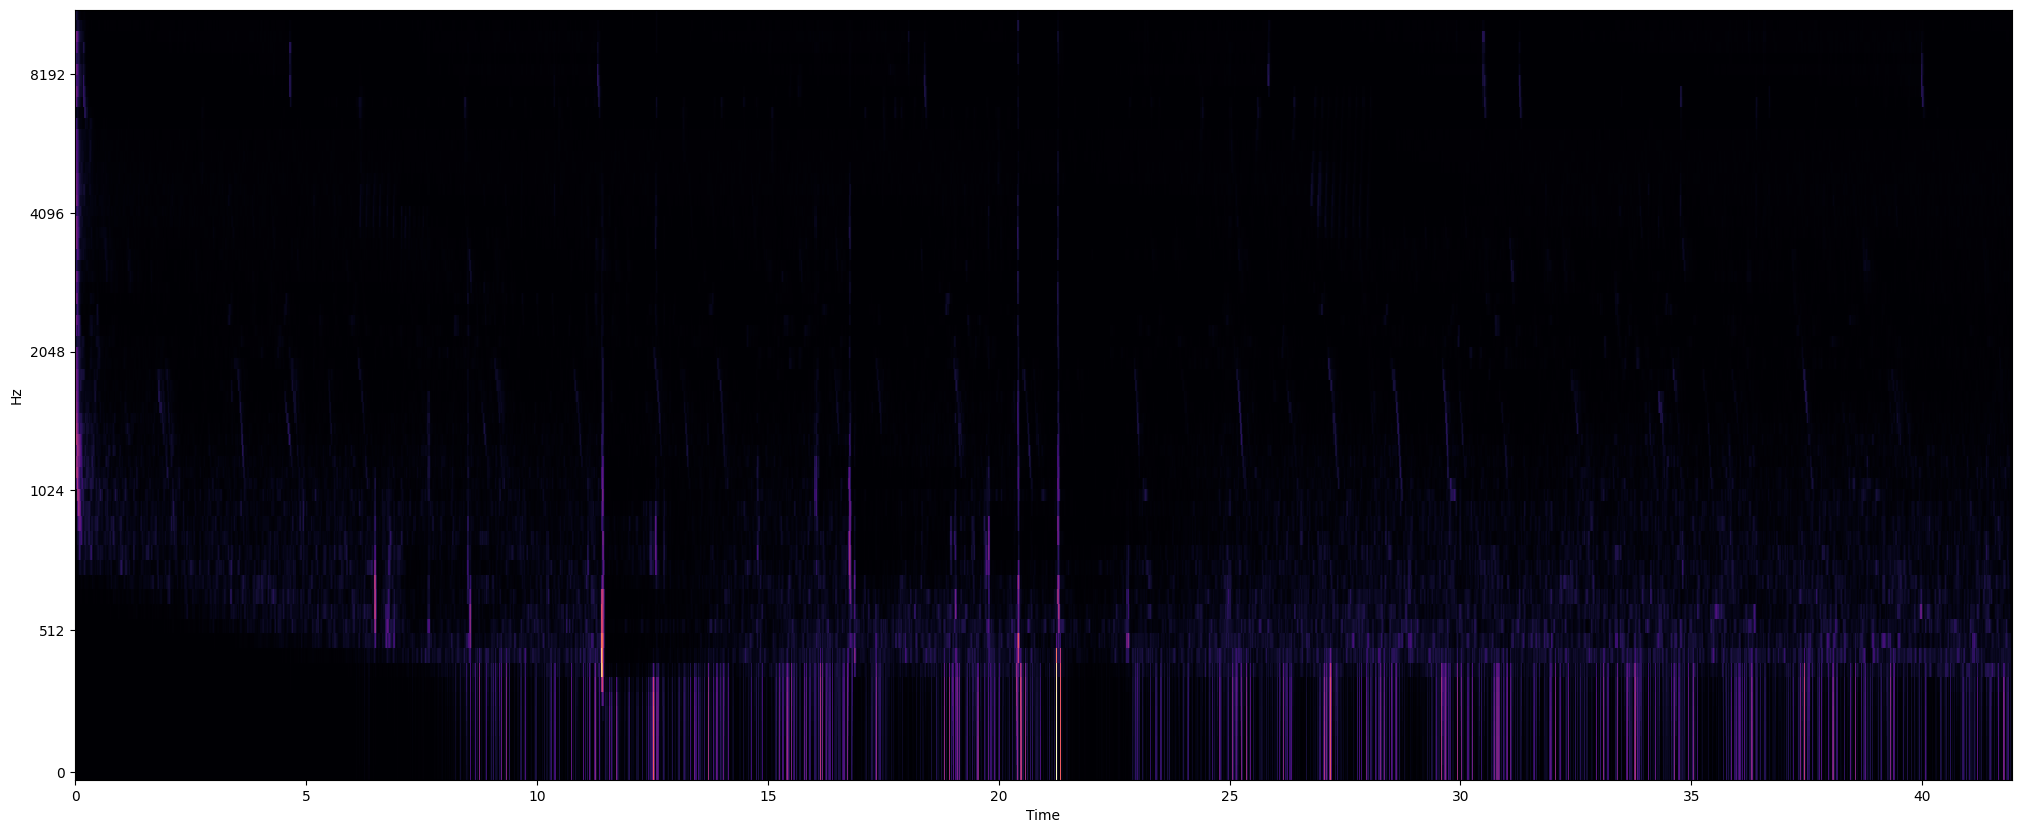

In [19]:
plt.figure(figsize=(25,10))
librosa.display.specshow(Dp3, x_axis='time', y_axis='mel')